In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:/Self Data Science learning/ML/train.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.select_dtypes(exclude=object).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2    173638
Product_Category_3    383247
Purchase                   0
dtype: int64

here we see that there are 173638 null values in product_category_2 and 383247 null values in product_category_2

# Let's visualize it

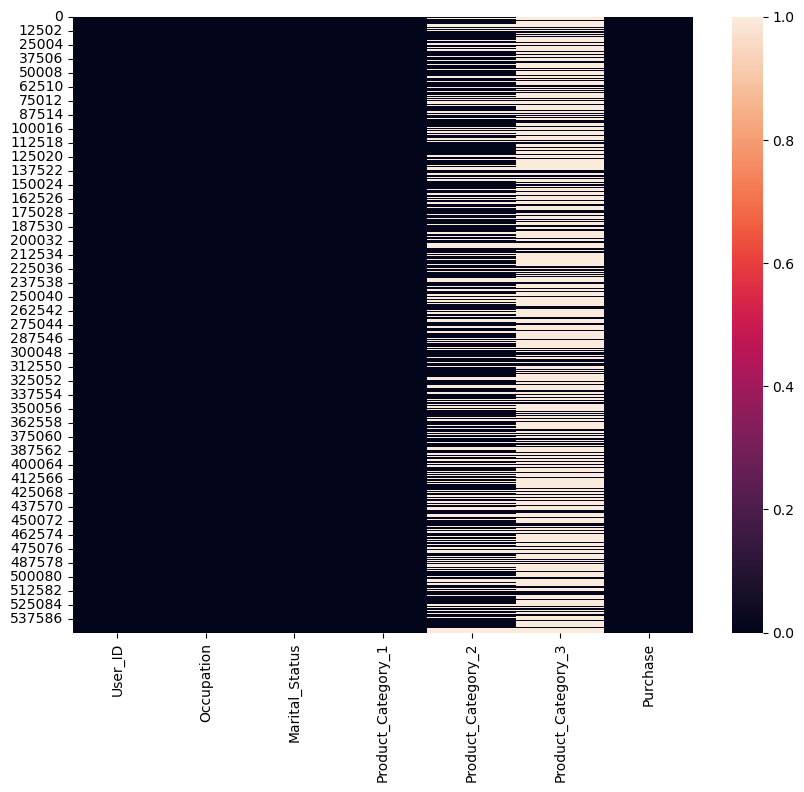

In [5]:
#creating a heat map to visualize the null values
plt.figure(figsize=(10,8))
sns.heatmap(data=df.select_dtypes(exclude=object).isnull()) 
plt.show()

In this graph we clealry see that there are null values present in product_category_2 and product_category_3

Here we use Random sample Imputation to replace missing values and check which one is best for our data set

# Product_Category_2 Column

# Random sample Imputation

In [6]:
# randommly select the values and replace in the place of null value

In [7]:
df['Product_Category_2'].isnull().sum()    #check null values sum

173638

In [8]:
new= df['Product_Category_2'].dropna().sample(df['Product_Category_2'].isnull().sum(),random_state=11)
#In our column Product_Category_2 we drop all the null column randomly and store in a variable new, we use random_state so that our variable didnot change when we rin program multiple times

In [9]:
new

141297    16.0
37884      5.0
403041     6.0
419929    11.0
287344    16.0
          ... 
199684     2.0
299984     4.0
480528     5.0
39336     13.0
27073      2.0
Name: Product_Category_2, Length: 173638, dtype: float64

In [10]:
new.index       #check index

Int64Index([141297,  37884, 403041, 419929, 287344, 486116, 202396, 384585,
            520188, 469916,
            ...
            269739, 133648, 250707, 193679,  95828, 199684, 299984, 480528,
             39336,  27073],
           dtype='int64', length=173638)

In [11]:
df[df['Product_Category_2'].isnull()].index  # gives the index of null values points


Int64Index([     0,      2,      4,      9,     11,     12,     21,     22,
                23,     26,
            ...
            550058, 550059, 550060, 550061, 550062, 550063, 550064, 550065,
            550066, 550067],
           dtype='int64', length=173638)

In [12]:
x=df[df['Product_Category_2'].isnull()].head(3)
x

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [13]:
# step_1:
#create a new column and copy the data of Product_Category_2 in it
df["Product_Category_2_random_replaced"]=df['Product_Category_2'].copy()

In [14]:
# step 2 select random values 
new = df['Product_Category_2'].dropna().sample(df['Product_Category_2'].isnull().sum(),random_state=11)
new

141297    16.0
37884      5.0
403041     6.0
419929    11.0
287344    16.0
          ... 
199684     2.0
299984     4.0
480528     5.0
39336     13.0
27073      2.0
Name: Product_Category_2, Length: 173638, dtype: float64

In [15]:
# step 3: assign index to null positions 
new.index = df[df['Product_Category_2'].isnull()].index  #  new index will be replaced with null value index 

In [16]:
# step 4:
df.loc[df['Product_Category_2'].isnull(),'Product_Category_2_random_replaced'] = new

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_random_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,16.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,6.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,5.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,14.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,6.0


We replace all the null values with random values and add a new column in our data. Now we check is there any null values in our new column

In [18]:
df['Product_Category_2_random_replaced'].isnull().sum()

0

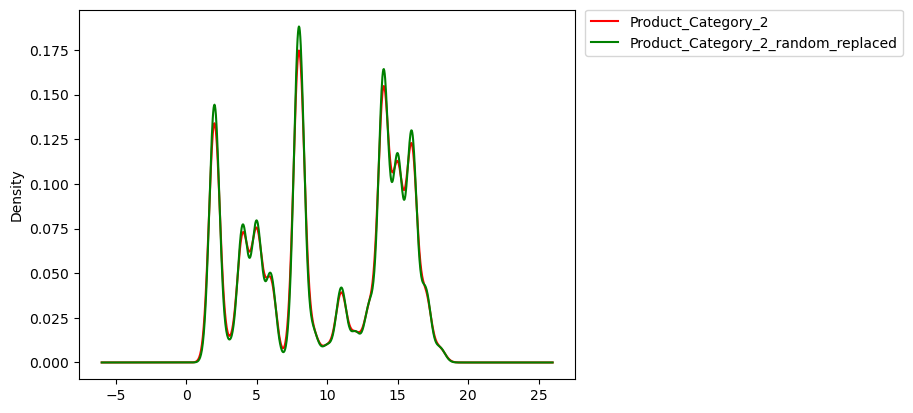

In [30]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_2'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_2') # before filling null values
df['Product_Category_2_random_replaced'].plot(kind='kde',ax=ax,color='g',legend='Product_Category_2_random_replaced')# after filling null values with random value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [31]:
print('original column std = ',df['Product_Category_2'].std())
print('random sample std = ',df['Product_Category_2_random_replaced'].std())

original column std =  5.08658964870293
random sample std =  5.086908894980113


See how perfectly random sample method would work

# Product_Category_3_Column

In [21]:
# step_1:
#create a new column and copy the data of Product_Category_2 in it
df["Product_Category_3_random_replaced"]=df['Product_Category_3'].copy()

In [23]:
# step 2 select random values 
new1 = df['Product_Category_3'].dropna().sample(df['Product_Category_3'].isnull().sum(),random_state=11,replace=True)

In [24]:
# step 3: assign index to null positions 
new1.index = df[df['Product_Category_3'].isnull()].index  #  new index will be replaced with null value index 

In [25]:
# step 4:
df.loc[df['Product_Category_3'].isnull(),'Product_Category_3_random_replaced'] = new1

In [26]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_2_random_replaced,Product_Category_3_random_replaced
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,16.0,16.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,5.0,5.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,14.0,8.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,6.0,14.0


In [28]:
df['Product_Category_3_random_replaced'].isnull().sum()     #no null values

0

In [29]:
#let's visualize

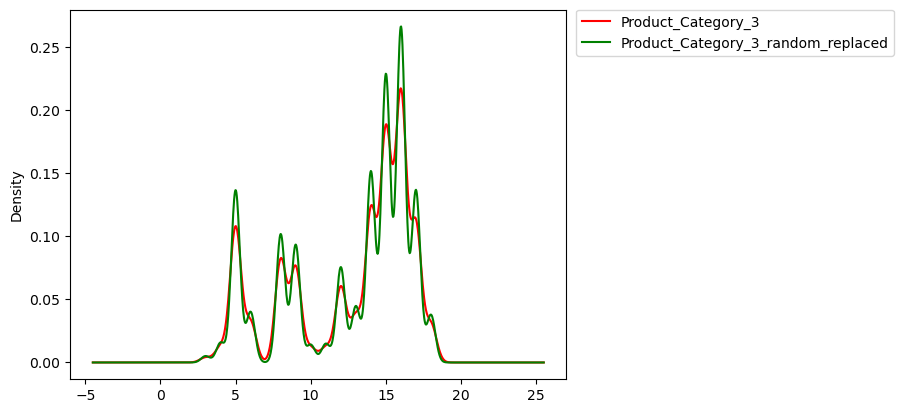

In [32]:
fig = plt.figure()   #we want default fig size       
ax = fig.add_subplot(1,1,1) # 1,1,1 means the figure has 1 row, 1columns, and this plot is the first plot.

df['Product_Category_3'].plot(kind='kde',ax=ax,color='r',legend='Product_Category_3') # before filling null values
df['Product_Category_3_random_replaced'].plot(kind='kde',ax=ax,color='g',legend='Product_Category_3_random_replaced')# after filling null values with random value

#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()